<a href="https://colab.research.google.com/github/springboardmentor1979b-cmyk/ScoreSight---Predicting-EPL-Points-Tally-Top-Scorer/blob/vishal_umare/Vishal_EplScorePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CHANGE PATH TO YOUR FILE
file_path = '/content/drive/MyDrive/Internship/dataset_epl.csv'
df = pd.read_csv(file_path)
print(df['Goals'].max())

180


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [33]:
df.shape

(571, 59)

In [34]:
df.head(10)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0
5,William Saliba,4.0,Arsenal,Defender,France,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
6,Sokratis,5.0,Arsenal,Defender,Greece,32.0,44,21,11,3,...,NaN,NaN,NaN,NaN,NaN,NaN,18,0,56,1.0
7,Rob Holding,16.0,Arsenal,Defender,England,25.0,41,25,9,0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,0,32,0.0
8,Shkodran Mustafi,20.0,Arsenal,Defender,Germany,28.0,99,52,26,7,...,NaN,NaN,NaN,NaN,NaN,NaN,28,0,117,7.0
9,Calum Chambers,21.0,Arsenal,Defender,England,25.0,139,47,57,6,...,NaN,NaN,NaN,NaN,NaN,NaN,28,1,137,2.0


In [35]:
df.tail(3)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


Check for Missing Values

In [36]:
print(df["Goals"].isnull().sum())


0


Ensure Column is Numeric

In [37]:
df["Goals"] = pd.to_numeric(df["Goals"], errors="coerce")
df = df.dropna(subset=["Goals"])

## ***EXPLORATORY DATA ANALYSIS***

**Histogram → X: Goals | Y: Frequency**

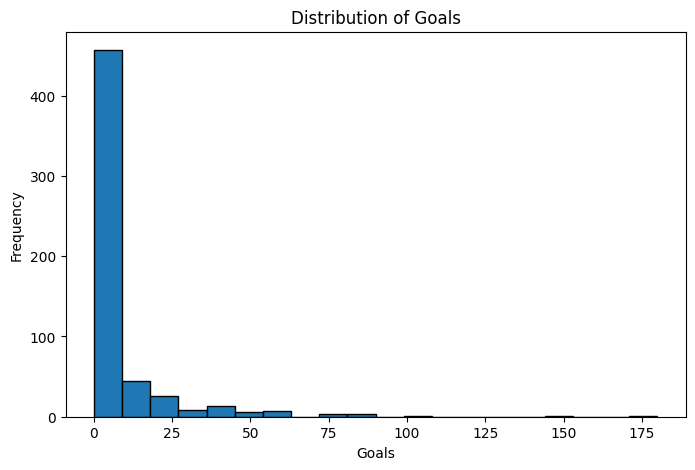

In [38]:
plt.figure(figsize=(8,5))
plt.hist(df['Goals'], bins=20, edgecolor='black')
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.title("Distribution of Goals")
plt.show()


**2. SCATTER PLOT: Appearances vs Goals**

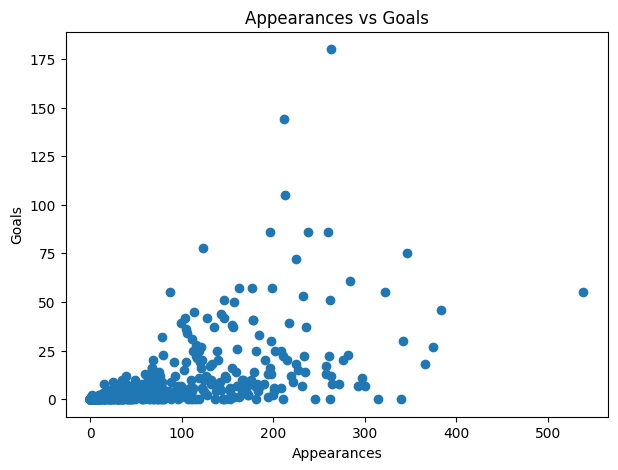

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(df['Appearances'], df['Goals'])
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.title("Appearances vs Goals")
plt.show()


**3. SCATTER PLOT: Age vs Goals**

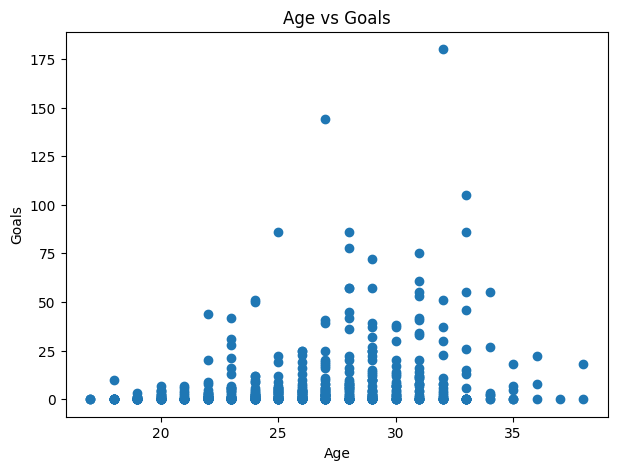

In [40]:
plt.figure(figsize=(7,5))
plt.scatter(df['Age'], df['Goals'])
plt.xlabel("Age")
plt.ylabel("Goals")
plt.title("Age vs Goals")
plt.show()


**4. BAR CHART: Club vs Goals (Sum)**

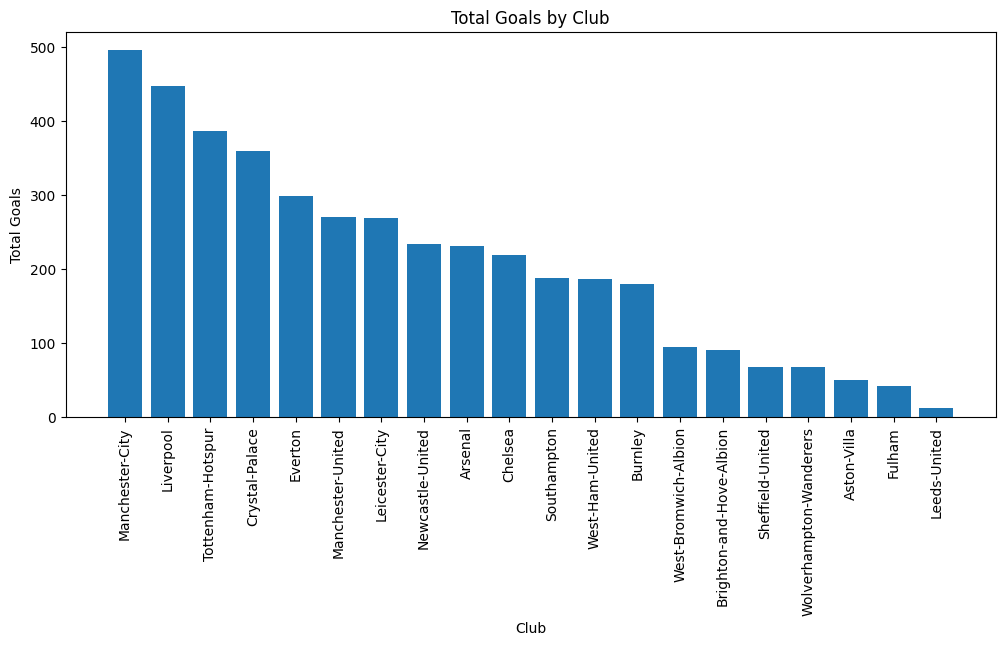

In [41]:
club_goals = df.groupby('Club')['Goals'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
plt.bar(club_goals.index, club_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Club")
plt.ylabel("Total Goals")
plt.title("Total Goals by Club")
plt.show()


**5. BAR CHART: Position vs Goals (Average)**

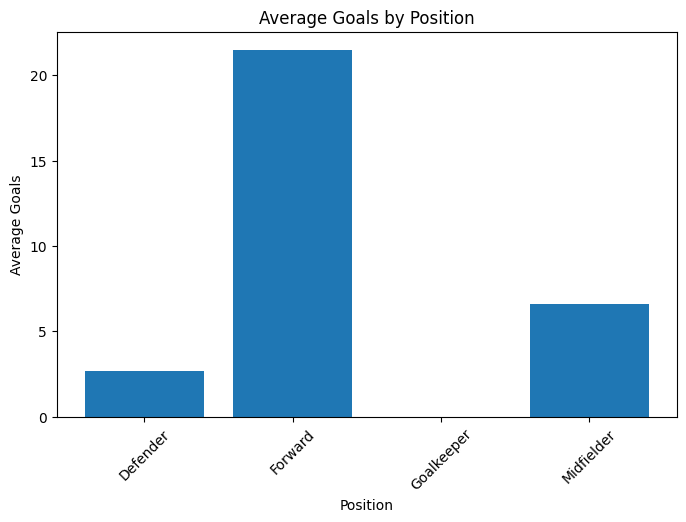

In [42]:
pos_goals = df.groupby('Position')['Goals'].mean()

plt.figure(figsize=(8,5))
plt.bar(pos_goals.index, pos_goals.values)
plt.xticks(rotation=45)
plt.xlabel("Position")
plt.ylabel("Average Goals")
plt.title("Average Goals by Position")
plt.show()


**6. SCATTER PLOT: Shots vs Goals**

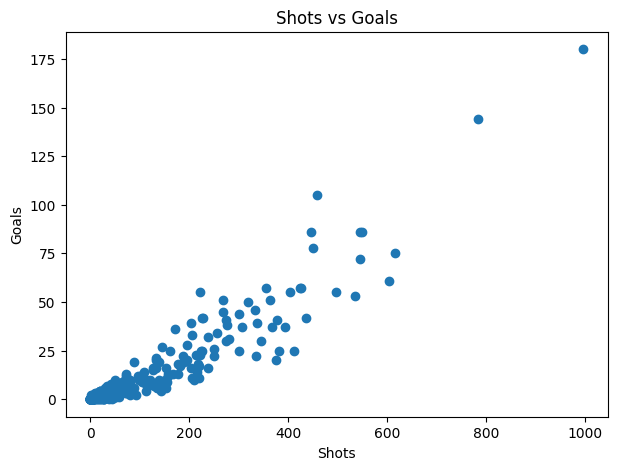

In [43]:
plt.figure(figsize=(7,5))
plt.scatter(df['Shots'], df['Goals'])
plt.xlabel("Shots")
plt.ylabel("Goals")
plt.title("Shots vs Goals")
plt.show()


**7. SCATTER PLOT: Assists vs Goals**

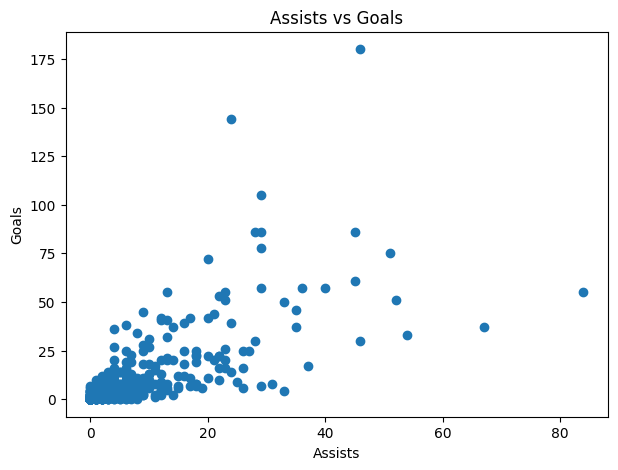

In [44]:
plt.figure(figsize=(7,5))
plt.scatter(df['Assists'], df['Goals'])
plt.xlabel("Assists")
plt.ylabel("Goals")
plt.title("Assists vs Goals")
plt.show()


**8. SCATTER PLOT: Passes vs Assists**

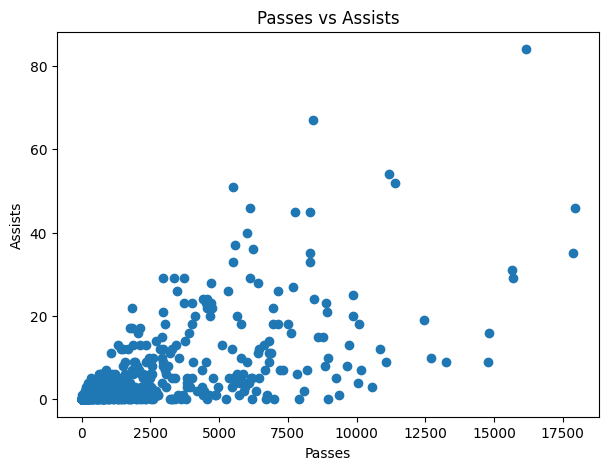

In [45]:
plt.figure(figsize=(7,5))
plt.scatter(df['Passes'], df['Assists'])
plt.xlabel("Passes")
plt.ylabel("Assists")
plt.title("Passes vs Assists")
plt.show()


**9. SCATTER PLOT: Tackles vs Tackle Success %**

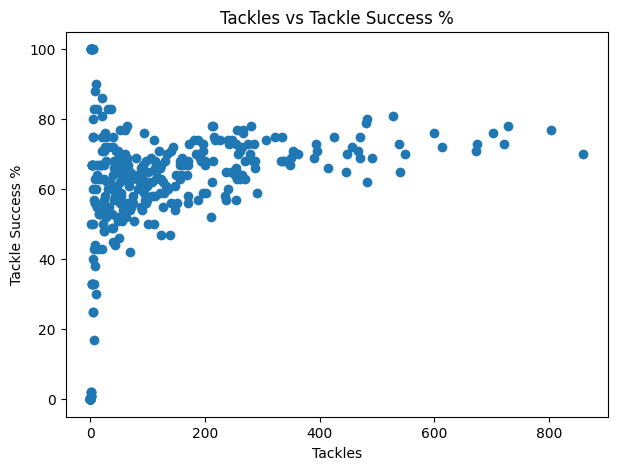

In [46]:
# Convert "Tackle success %" from string to numeric
df['Tackle success %'] = (
    df['Tackle success %']
    .astype(str)
    .str.replace('%', '', regex=False)
)

df['Tackle success %'] = pd.to_numeric(df['Tackle success %'], errors='coerce')

plt.figure(figsize=(7,5))
plt.scatter(df['Tackles'], df['Tackle success %'])
plt.xlabel("Tackles")
plt.ylabel("Tackle Success %")
plt.title("Tackles vs Tackle Success %")
plt.show()


**10. BAR CHART: Nationality vs Goals (Sum)**

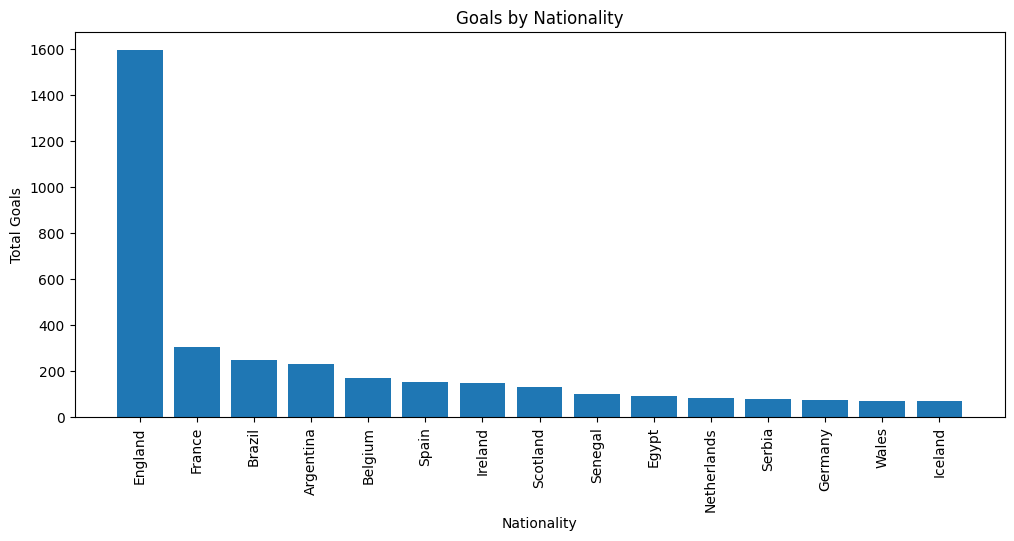

In [47]:
nat_goals = df.groupby('Nationality')['Goals'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,5))
plt.bar(nat_goals.index, nat_goals.values)
plt.xticks(rotation=90)
plt.xlabel("Nationality")
plt.ylabel("Total Goals")
plt.title("Goals by Nationality")
plt.show()


In [48]:
print(df.isnull().sum())

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [49]:
df = df.fillna(df.median(numeric_only=True))

## ***FEATURE SCALING***

In [50]:
X = df[['Appearances', 'Passes', 'Assists', 'Shots']]
y = df['Goals']

HANDLE MISSING VALUES

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_clean = imputer.fit_transform(X)


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


In [53]:
print(df[['Goals', 'Appearances', 'Passes']].head(10))


   Goals  Appearances  Passes
0      0           64    1783
1      0            0       0
2      0            0       0
3      7          160    7125
4      1           16     519
5      0            0       0
6      3           44    2416
7      0           41    2200
8      7           99    5907
9      6          139    5935


In [86]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# 1. Features for the APP (4 features)
feature_cols = ['Appearances', 'Shots', 'Passes', 'Assists']
minmax_scaler = MinMaxScaler()
X_scaled = minmax_scaler.fit_transform(df[feature_cols])

# 2. Scale Goals separately JUST for the plot (Fixes KeyError)
goal_scaler = MinMaxScaler()
goals_scaled = goal_scaler.fit_transform(df[['Goals']])

# 3. Create the dataframe for your scatter plots
minmax_df = pd.DataFrame(X_scaled, columns=[f"{col}_mm" for col in feature_cols])
minmax_df['Goals_mm'] = goals_scaled  # <--- This fixes your scatter plot!

# 4. Set X and y for training
X = X_scaled
y = df['Goals'] # Using RAW goals (the model will now predict numbers like 11.7)

print("Scaler is ready with 4 features.")
print("Plotting columns available:", minmax_df.columns.tolist())

Scaler is ready with 4 features.
Plotting columns available: ['Appearances_mm', 'Shots_mm', 'Passes_mm', 'Assists_mm', 'Goals_mm']


In [55]:
# Apply standardization (z-score)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

z_scaled = scaler.fit_transform(
    df[['Goals', 'Shots', 'Passes']]
)

z_df = pd.DataFrame(
    z_scaled,
    columns=['Goals_z', 'Shots_z', 'Passes_z']
)

z_df.head()


,Goals_z,Shots_z,Passes_z
0,-0.436270,-0.300435,-0.168573
1,-0.436270,-0.300435,-0.739227
2,-0.436270,-0.300435,-0.739227
3,-0.019499,-0.300435,1.541148
4,-0.376732,-0.300435,-0.573119


## **Comparing scatter plots before vs. after feature scaling**

**Goals vs Appearances (Before Scaling)**

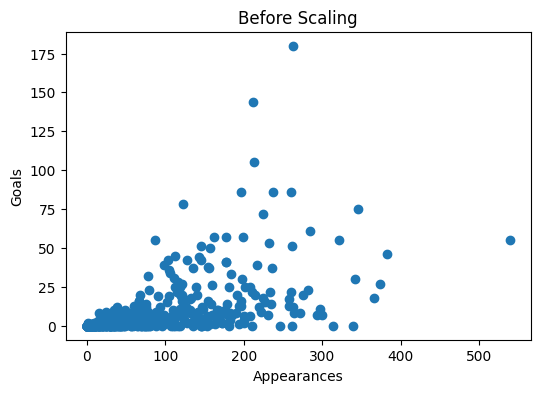

In [56]:

plt.figure(figsize=(6,4))
plt.scatter(df['Appearances'], df['Goals'])
plt.title("Before Scaling")
plt.xlabel("Appearances")
plt.ylabel("Goals")
plt.show()


**Goals vs Appearances (After Min-Max Scaling)**

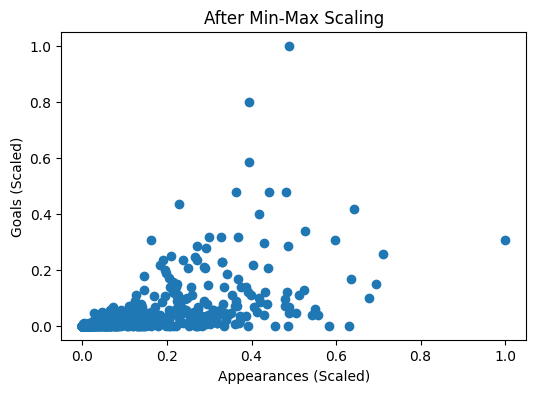

In [87]:
plt.figure(figsize=(6,4))
plt.scatter(minmax_df['Appearances_mm'], minmax_df['Goals_mm'])
plt.title("After Min-Max Scaling")
plt.xlabel("Appearances (Scaled)")
plt.ylabel("Goals (Scaled)")
plt.show()


**Goals vs Passes (Before Scaling)**

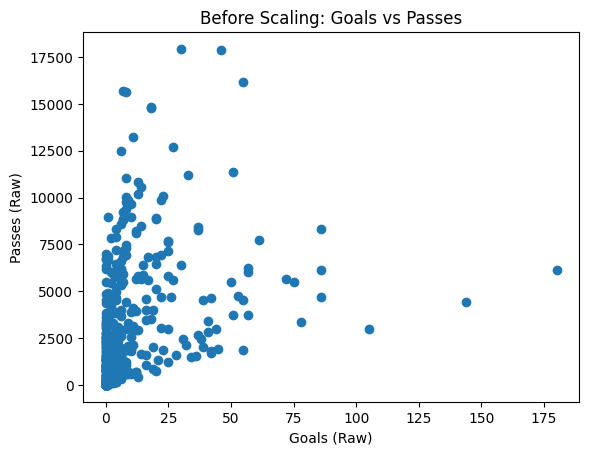

In [61]:
plt.scatter(df['Goals'], df['Passes'])
plt.xlabel("Goals (Raw)")
plt.ylabel("Passes (Raw)")
plt.title("Before Scaling: Goals vs Passes")
plt.show()


### **Train–Test Split**

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



### **2) Baseline Regression Model — Linear Regression**

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_lr = lr.predict(X_test)

print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R²:", r2_score(y_test, y_pred_lr))



Linear Regression Performance
MAE: 3.959065019863047
RMSE: 5.79161589916345
R²: 0.7747445206315571


### **2) Baseline Classification Model — Logistic Regression**

In [67]:
df["Goal_Class"] = (df["Goals"] > df["Goals"].median()).astype(int)

Xc = df[["Shots", "Passes", "Appearances"]]
yc = df["Goal_Class"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(Xc_train, yc_train)
y_pred_clf = clf.predict(Xc_test)


In [68]:
#Evaluate Classification Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(yc_test, y_pred_clf))
print("Precision:", precision_score(yc_test, y_pred_clf))
print("Recall:", recall_score(yc_test, y_pred_clf))
print("F1:", f1_score(yc_test, y_pred_clf))




Accuracy: 0.8608695652173913
Precision: 0.8571428571428571
Recall: 0.782608695652174
F1: 0.8181818181818182


## **4) VISUALIZATION**

Actual vs Predicted (Regression)

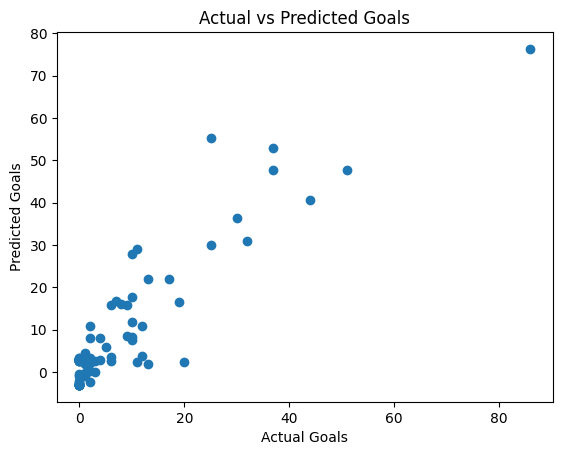

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual Goals")
plt.ylabel("Predicted Goals")
plt.title("Actual vs Predicted Goals")
plt.show()


Confusion Matrix (Classification)

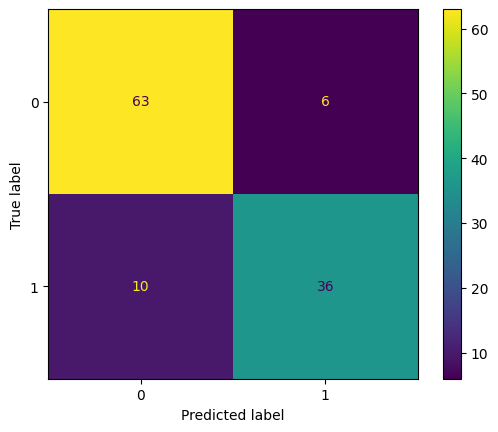

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(yc_test, y_pred_clf)
plt.show()


## **5) ADVANCED MODELS**

**A) Regression Model — Random Forest Regressor**

In [71]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)




In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²  :", r2_score(y_true, y_pred))



**B) Gradient Boosting Classifier**

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)



In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² :", r2_score(y_true, y_pred))


In [75]:
#Model Evaluation
evaluate("Random Forest", y_test, y_pred_rf)
evaluate("Gradient Boosting", y_test, y_pred_gbr)




Random Forest
MAE : 2.3225141303529018
RMSE: 4.569940762867138
R² : 0.859751894969108

Gradient Boosting
MAE : 2.3144590880606457
RMSE: 4.340181363237
R² : 0.8734996822964339


## **6) HYPERPARAMETER TUNING**

**A) Random Forest Regressor (GridSearchCV)**

In [76]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF Params:", grid_rf.best_params_)


Best RF Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


**B) Gradient Boosting (GridSearch)**

In [77]:
gb_params = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}

grid_gb = GridSearchCV(
    GradientBoostingRegressor(),
    gb_params,
    cv=5,
    scoring="r2"
)

grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best GB Params:", grid_gb.best_params_)


Best GB Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


## **7 — PERFORMANCE COMPARISON**

In [78]:
models = {
    "Linear Regression": lr,
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb
}

results = []

for name, model in models.items():
    preds = model.predict(X_test)
    results.append([
        name,
        mean_absolute_error(y_test, preds),
        np.sqrt(mean_squared_error(y_test, preds)),
        r2_score(y_test, preds)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "RMSE", "R²"]
)

print(results_df)


               Model       MAE      RMSE        R²
0  Linear Regression  3.959065  5.791616  0.774745
1      Random Forest  2.306783  4.529317  0.862234
2  Gradient Boosting  2.331829  4.333035  0.873916


In [79]:
import joblib

# choose ONE final trained model
final_model = lr   # or rf_model (your choice)

# choose ONE scaler you used with this model
final_scaler = minmax_scaler

joblib.dump(final_model, "model.pkl")
joblib.dump(final_scaler, "scaler.pkl")

print("Model and scaler saved")


Model and scaler saved
